# Matplotlib


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib

matplotlib._version.version

'3.7.0'

In [3]:
x = np.linspace(-3, 3, 50)
y = 2*x + 1

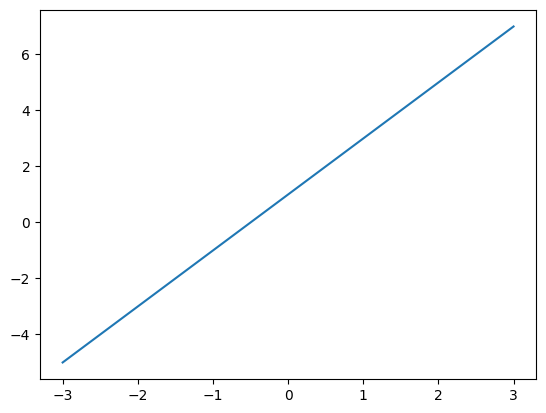

In [4]:
plt.figure()
plt.plot(x, y)
plt.show()

画多条线

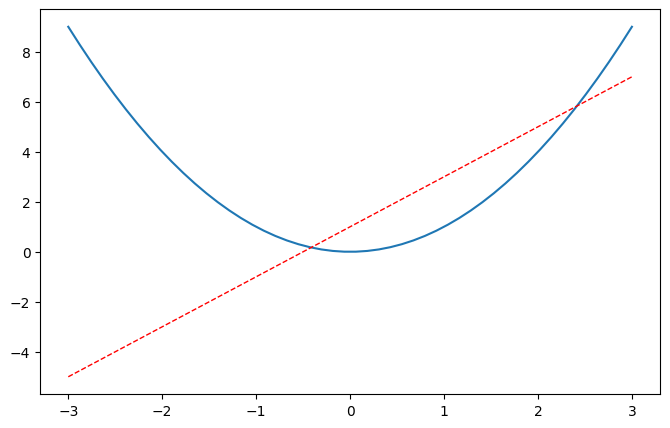

In [5]:
y2 = x**2

def drawY_Y2():
    plt.figure(num=3, figsize=(8,5))
    global l1, l2
    l1, = plt.plot(x, y2, label="linear line")
    l2, = plt.plot(x, y, color='red', linewidth=1.0, linestyle='--', label="square line")

drawY_Y2()
plt.show()

设置坐标轴的范围和名称

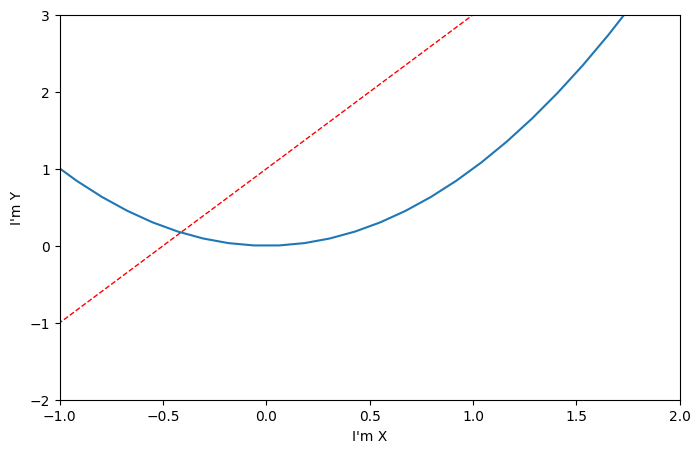

In [6]:
def draw_with_axes():
    drawY_Y2()

    plt.xlim((-1,2))
    plt.ylim((-2,3))
    plt.xlabel("I'm X")
    plt.ylabel("I'm Y")

draw_with_axes()

设置坐标轴的刻度

[-1.   -0.25  0.5   1.25  2.  ]


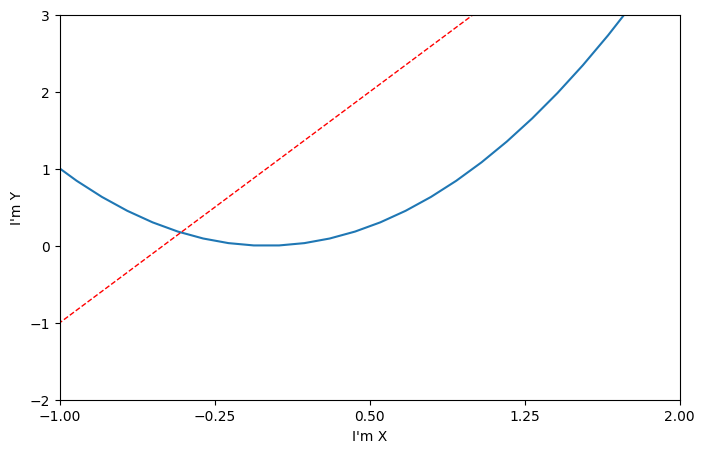

In [7]:
def draw_axes_ticks(xticks, yticks=None):
    draw_with_axes()
    plt.xticks(xticks)
    if yticks:
        plt.yticks(yticks)

x_new_ticks = np.linspace(-1, 2, 5)
print(x_new_ticks)

draw_axes_ticks(x_new_ticks)

设置坐标轴的刻度及相对应的名称

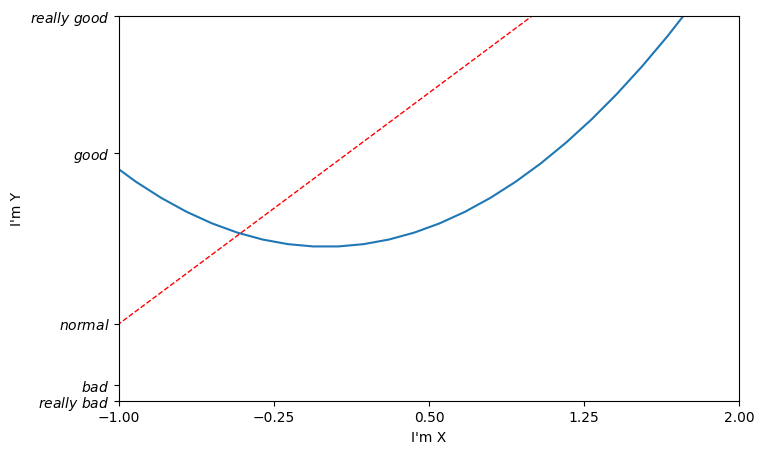

In [8]:
def draw_axes_ticks_labels():
    y_new_ticks = [-2, -1.8, -1, 1.22, 3]
    y_new_tick_labels = [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$']

    draw_axes_ticks(x_new_ticks)
    plt.yticks(y_new_ticks, y_new_tick_labels)

draw_axes_ticks_labels()
plt.show()

设置坐标轴边框

- 使用 plt.gca 获取当前坐标轴信息；
- 使用 .spines 设置边框；
- 使用 .set_color 设置边框颜色：默认白色。

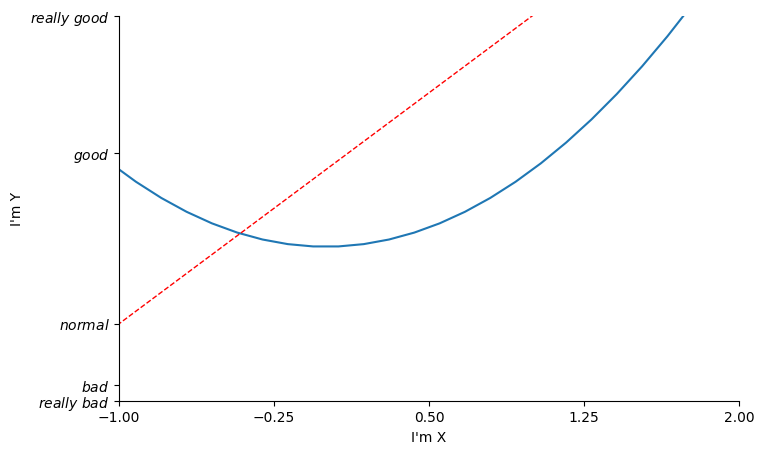

In [9]:
def draw_axes_ticks_spines():
    draw_axes_ticks_labels()

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    return ax

draw_axes_ticks_spines()
plt.show()

调整坐标轴

使用 `.xaxis.set_ticks_position` 设置 x 坐标刻度位置：默认是 bottom。使用 `yaxis.set_ticks_position` 设置 y 坐标刻度位置。
（所有可选位置：top，bottom，both，default，none）

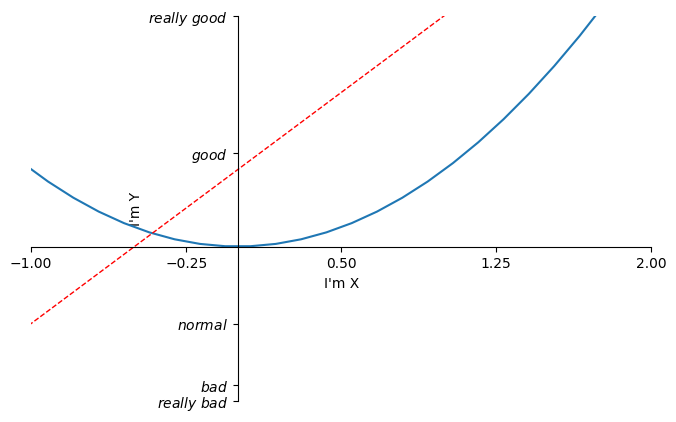

In [10]:
def draw_axes_position():
    ax = draw_axes_ticks_spines()

    # ax.xaxis.set_ticks_position('bottom')

    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data',0))

draw_axes_position()
plt.show()

图例 Legend

参考 [文档](https://matplotlib.org/2.0.2/users/legend_guide.html)

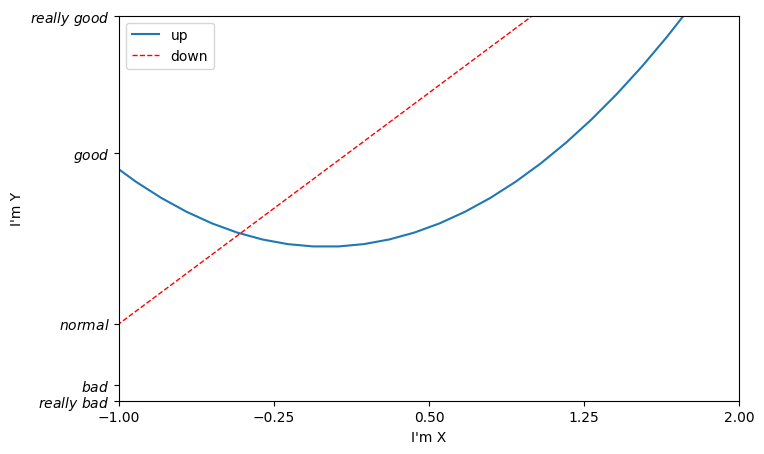

In [11]:
def draw_legend():
    draw_axes_ticks_labels()

    # plt.legend(loc='upper right')
    plt.legend(handles=[l1, l2], labels=["up", "down"], loc="best")

draw_legend()
plt.show()

Annotation 标注

Text(-3.7, 3, '$This\\ is\\ the\\ some\\ text. \\mu\\ \\sigma_i\\ \\alpha_t$')

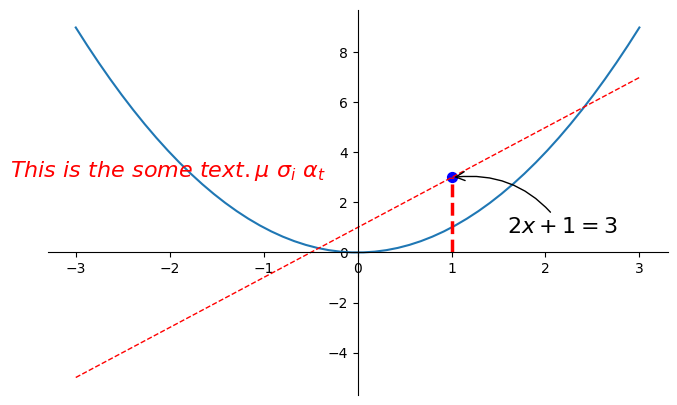

In [12]:
drawY_Y2()

# 移动坐标轴
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# y = f(x) = 2x + 1
x0 = 1
y0 = 2*x0 + 1

plt.plot([x0, x0,], [0, y0,], 'r--', linewidth=2.5)
# set dot styles
plt.scatter([x0, ], [y0, ], s=50, color='b')

# 标注：
# 参数 xycoords='data' 是说基于数据的值来选位置，
# xytext 和 textcoords 是对于标注位置的描述 和 xy 偏差值，
# arrowprops 是对图中箭头类型的一些设置
plt.annotate(r'$2x+1=%s$' % y0, xy=(x0, y0), xycoords='data', xytext=(+40, -40),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.3"))


# 添加注释 text
plt.text(-3.7, 3, r'$This\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size': 16, 'color': 'r'})

设置透明度

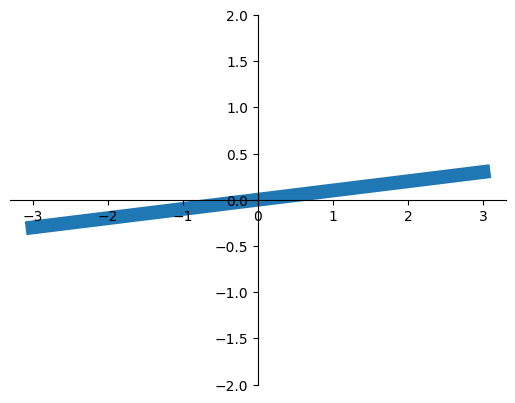

In [13]:
def draw_testing():
    x = np.linspace(-3, 3, 50)
    y = 0.1*x

    plt.figure()
    # 设置 zorder 给 plot 在 z 轴方向排序
    plt.plot(x, y, linewidth=10, zorder=1)
    plt.ylim(-2, 2)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))

    return ax

draw_testing()
plt.show()

观察上图，x轴 和 y轴 的刻度数字被遮挡，需要调节相关透明度设置。

- label.set_fontsize(12) 重新调节字体大小
- bbox 设置目的内容的透明度相关参：
   - facecolor 设置前景色
   - edgecolor 设置边框
   - alpha 设置透明度

最终结果如下:

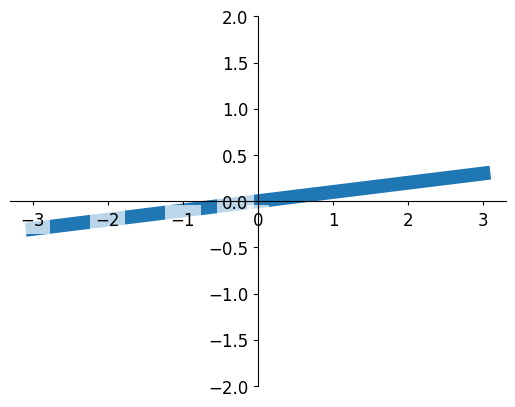

In [14]:
ax = draw_testing()

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    # 设置 zorder 给 plot 在 z 轴方向排序
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.7, zorder=2))

plt.show()

## 散点图 scatter



In [15]:
n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

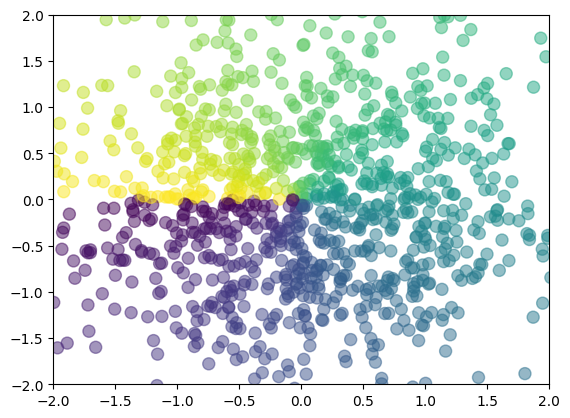

In [16]:
plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-2, 2)
plt.ylim(-2, 2)

# ignore ticks
# plt.xticks(()) 
# plt.yticks(())

plt.show()

In [17]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

## 柱状图 bar


In [18]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

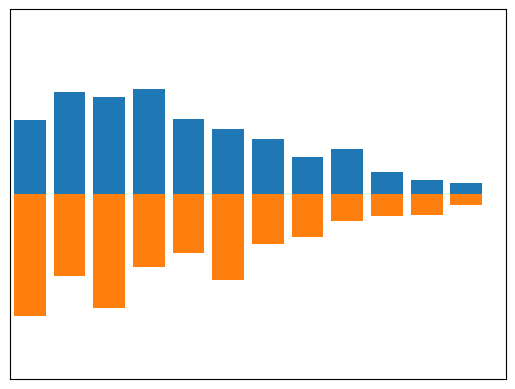

In [19]:
def set_axes_limits():
    plt.xlim(-.5, n)
    plt.xticks(())
    plt.ylim(-1.25, 1.25)
    plt.yticks(())

plt.bar(X, +Y1)
plt.bar(X, -Y2)

set_axes_limits()

用 facecolor 设置主体颜色，用 edgecolor 设置边框颜色为白色

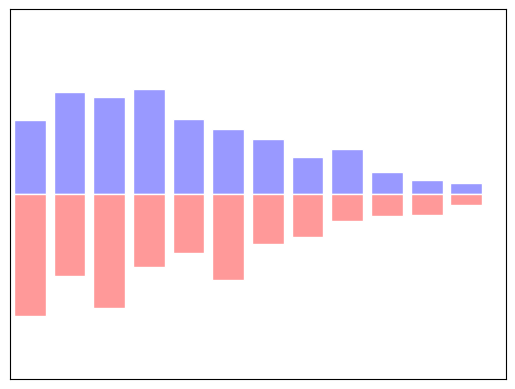

In [20]:
def set_color():
    plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
    plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

set_axes_limits()
set_color()

用函数 plt.text 分别在柱体上方（下方）加上数值

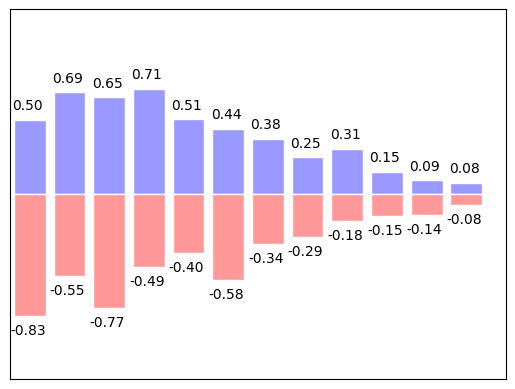

In [21]:
def set_text(X, Y):
    for x, y in zip(X,Y):
        if y > 0:
            # ha : horizontal alignment
            # va : vertical alignment
            plt.text(x-0.05, y + 0.05, "%.2f" % y, ha="center", va="bottom")
        else:
            plt.text(x-0.05, y-0.05, "%.2f" % y, ha="center", va="top")

set_axes_limits()
set_color()
set_text(X, Y1)
set_text(X, -Y2)

## 等高线图 Contours

In [22]:
def calc_height(x,y):
    """ the height function"""
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# 将二维平面中每一个 x 和每一个 y 分别对应起来，编织成栅格
X,Y = np.meshgrid(x, y)

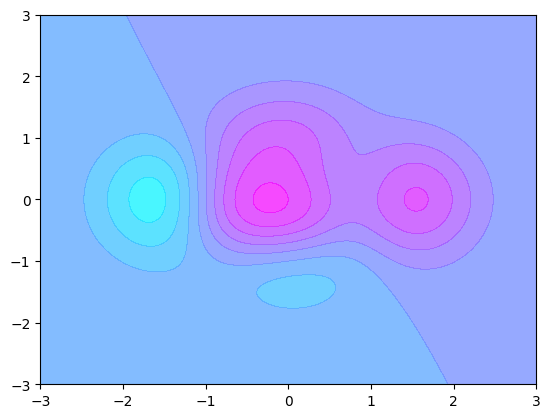

In [23]:
# contour filling
plt.contourf(X, Y, calc_height(X, Y), 8, alpha=.75, cmap=plt.cm.cool)

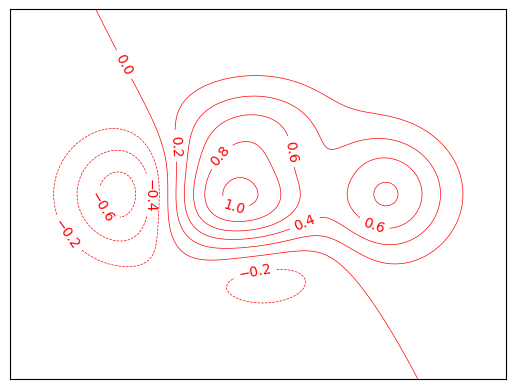

In [24]:
# contour
C = plt.contour(X, Y, calc_height(X, Y), 8, linewidths=.5, colors='red')

# adding label
plt.clabel(C, inline=True, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

## 随机矩阵画图


In [25]:
a = np.random.rand(3, 3)

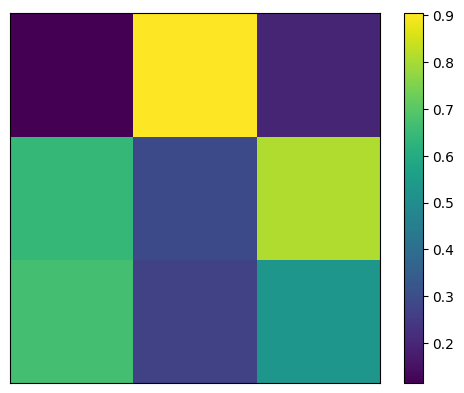

In [26]:
# origin 原点的位置
plt.imshow(a, interpolation='nearest', cmap=plt.cm.viridis, origin='lower')

# 增加一个颜色注释
# shrink 使 colorbar 的长度变短为原来的 92%
# plt.colorbar(shrink=.92)
plt.colorbar()

plt.xticks(())
plt.yticks(())
plt.show()

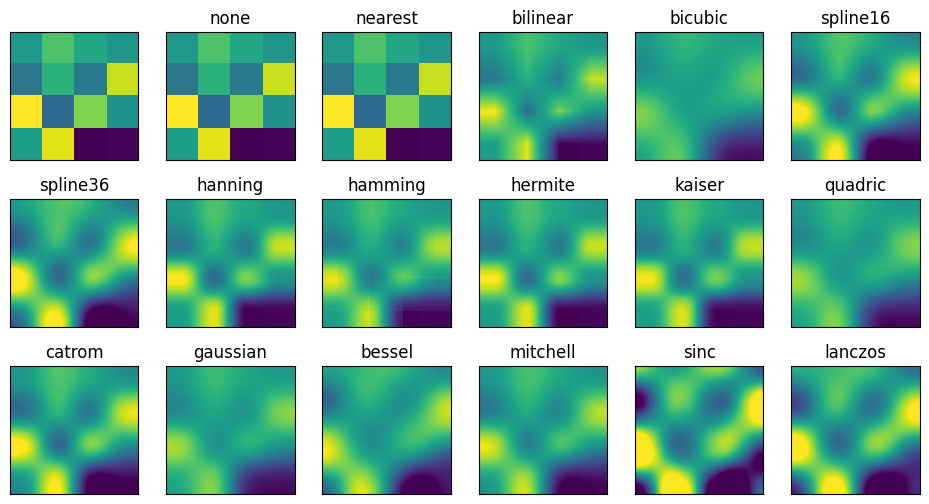

In [27]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

np.random.seed(0)
grid = np.random.rand(4, 4)

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(interp_method)

plt.show()

## 3D 图

In [28]:
from mpl_toolkits.mplot3d import Axes3D

<Axes3D: >

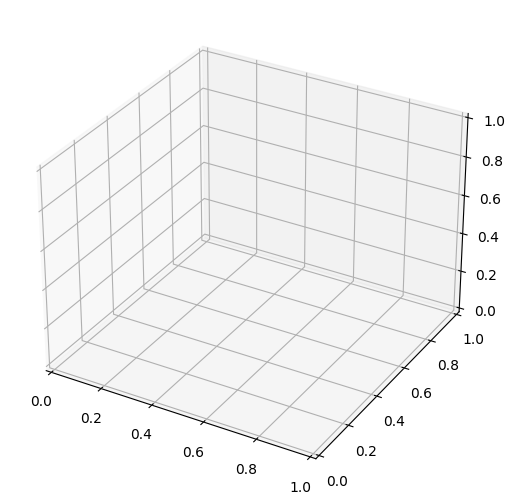

In [29]:
# testing

fig = plt.figure()

# auto_add_to_figure=False and add_axes to fig
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

In [30]:
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)

# x-y 平面的网格
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

做出一个三维曲面，并将一个 colormap rainbow 填充颜色，之后将三维图像投影到 XY 平面上做一个等高线图。

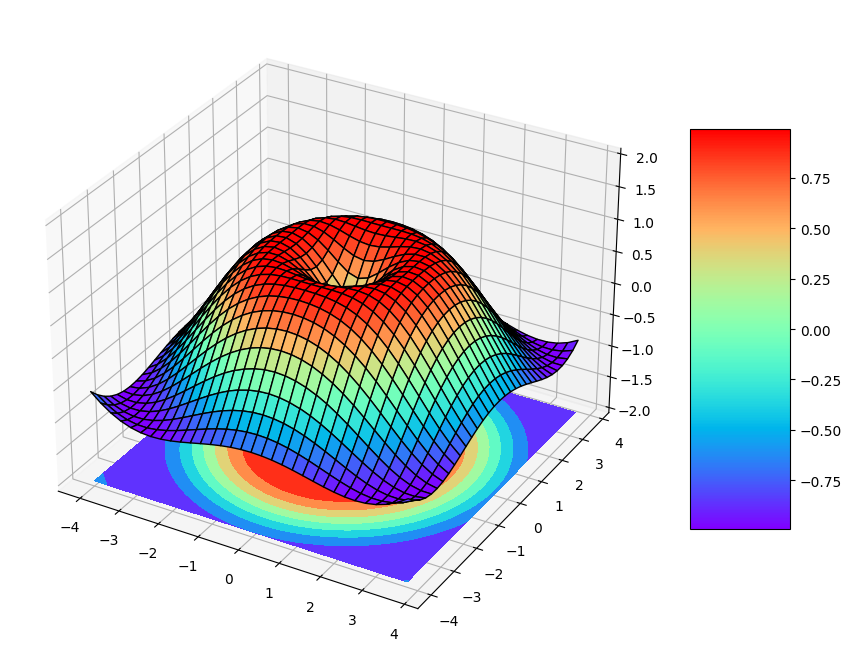

In [31]:
# 1)
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# fig.set_size_inches(8, 8)

# 2)
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Plot the surface.
# rstride 和 cstride 分别代表 row 和 column 的跨度。
# surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor="black", cmap=plt.cm.rainbow)

# 添加平面等高线
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
ax.set_zlim(-2, 2)

# 添加彩色图示
fig.colorbar(surf, shrink=0.5, aspect=4)

plt.show()

## Subplot 多合一显示

- 使用 plt.figure 创建一个图像窗口。
- 使用 plt.subplot 来创建小图， plt.subplot(2,2,1) 表示将整个图像窗口分为2行2列, 当前位置为1。
- 使用 plt.plot([0,1],[0,1]) 在第1个位置创建一个小图。

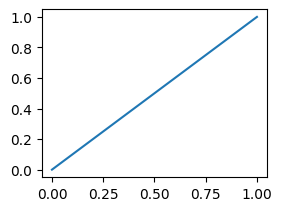

In [32]:
plt.figure()

plt.subplot(2,2,1)
plt.plot([0,1],[0,1])

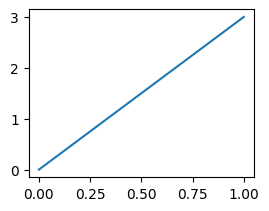

In [33]:
# plt.subplot(2,2,3)可以简写成plt.subplot(223)
plt.subplot(223)
plt.plot([0,1],[0,3])

### 排列多个小图

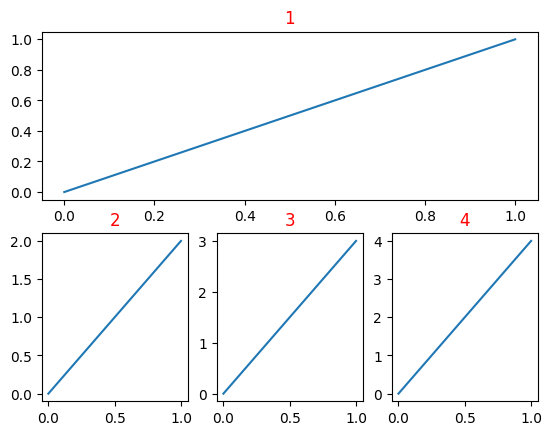

In [34]:
fdict = {"color": 'red'}

# 2 行 1 列，第 1 个位置 => 第一行
ax1 = plt.subplot(2,1,1)
plt.plot([0,1],[0,1])
ax1.set_title('1', fontdict=fdict)

# 2 行 3 列，第 4 个位置 => 第二行，第 1 个
ax2 = plt.subplot(2,3,4)
plt.plot([0,1],[0,2])
ax2.set_title('2', fontdict=fdict)

# 2 行 3 列，第 5 个位置 => 第二行，第 2 个
ax3 = plt.subplot(235)
plt.plot([0,1],[0,3])
ax3.set_title('3', fontdict=fdict)

# 2 行 3 列，第 6 个位置 => 第二行，第 3 个
ax4 = plt.subplot(236)
plt.plot([0,1],[0,4])
ax4.set_title('4', fontdict=fdict)

plt.show()

- 使用 grid 模式 —— subplot2grid

   使用 plt.subplot2grid 来创建第1个小图:
   - (3,3)表示将整个图像窗口分成3行3列,
   - (0,0)表示从第0行第0列开始作图，
   - colspan=3 表示列的跨度为3, 
   - rowspan=1表示行的跨度为1。

   colspan 和 rowspan 缺省, 默认跨度为1。

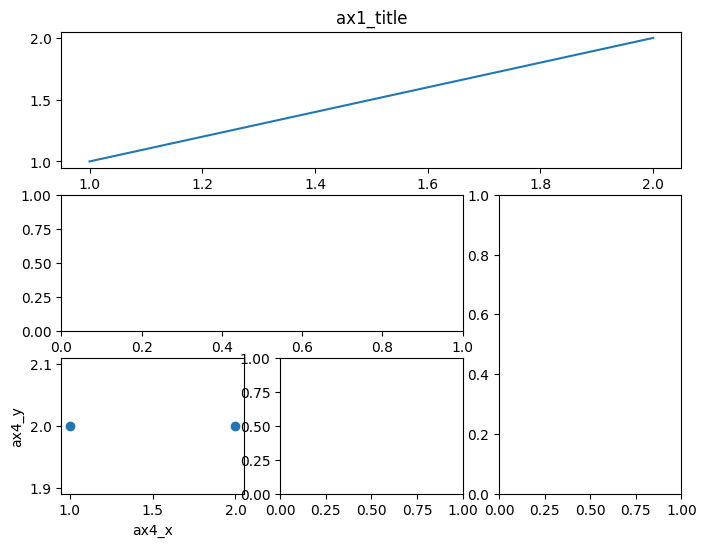

In [35]:
plt.figure(figsize=(8,6))

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.plot([1, 2], [1, 2])
ax1.set_title('ax1_title')

ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)

ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.scatter([1, 2], [2, 2])
ax4.set_xlabel('ax4_x')
ax4.set_ylabel('ax4_y')

ax5 = plt.subplot2grid((3, 3), (2, 1))

- 使用 grid 模式 —— gridspec


In [36]:
import matplotlib.gridspec as gridspec

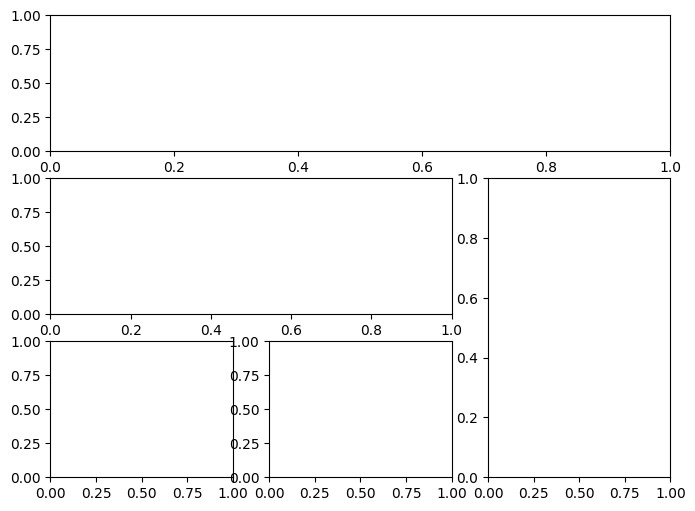

In [37]:
plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3)

# 占第0行和所有列
ax6 = plt.subplot(gs[0, :])

# 占第1行和第2列前的所有列
ax7 = plt.subplot(gs[1, :2])

# 占第1行后的所有行和第2列
ax8 = plt.subplot(gs[1:, 2])

# 占倒数第1行和第0列
ax9 = plt.subplot(gs[-1, 0])

# 占倒数第1行和倒数第2列
ax10 = plt.subplot(gs[-1, -2])

- subplots

   使用 plt.subplots 建立一个2行2列的图像窗口：
   
   - sharex=True表示共享x轴坐标
   - sharey=True表示共享y轴坐标
   -  ((ax11, ax12), (ax13, ax14)) 表示第1行从左至右依次放ax11和ax12, 第2行从左至右依次放ax13和ax14

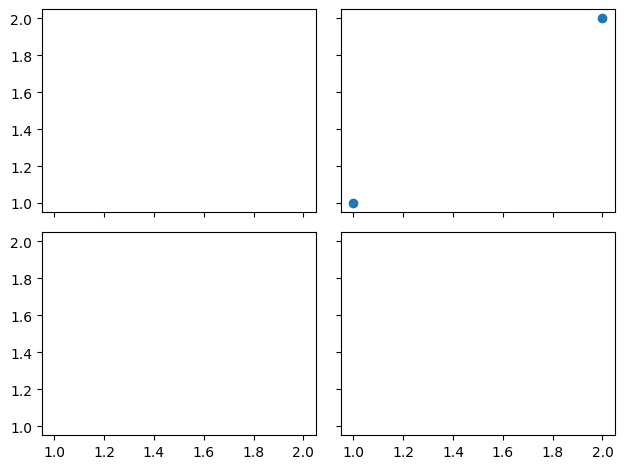

In [38]:
f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax12.scatter([1,2], [1,2])

# 紧凑显示图像
plt.tight_layout()

plt.show()

## 做图中图(plot in plot)

In [39]:
# 创建数据

x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 4, 2, 5, 8, 6]

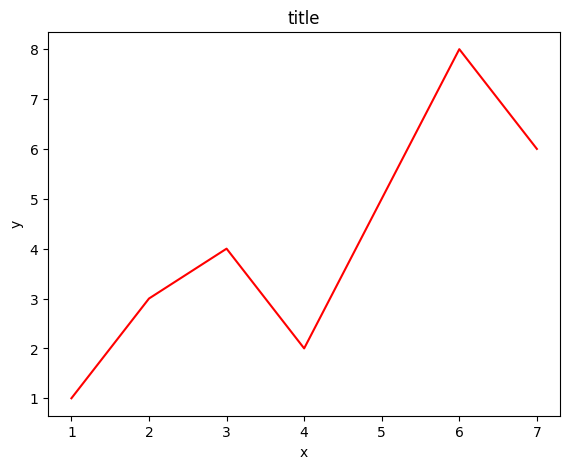

In [40]:
# 绘制大图

def fig1(fig):
    # 首先确定大图左下角的位置以及宽高：
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

    ax1 = fig.add_axes([left, bottom, width, height])
    ax1.plot(x, y, 'r')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('title')

# 初始化 figure
fig = plt.figure()

fig1(fig)
plt.show()

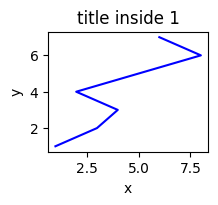

In [41]:
# 绘制小图

def fig2(fig):
    left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.plot(y, x, 'b')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('title inside 1')

fig = plt.figure()
fig2(fig)
plt.show()

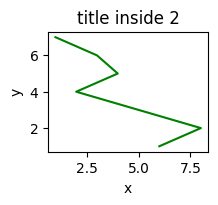

In [42]:
# 绘制右下角的小图

def fig3(fig):
    plt.axes([0.6, 0.2, 0.25, 0.25])
    plt.plot(y[::-1], x, 'g') # 注意对y进行了逆序处理
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('title inside 2')

fig = plt.figure()
fig3(fig)
plt.show()

In [43]:
y[::-1]

[6, 8, 5, 2, 4, 3, 1]

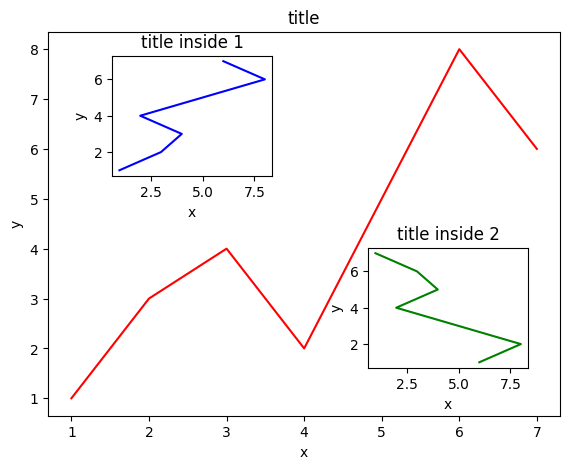

In [44]:
# 组合图

# 初始化 figure
fig = plt.figure()

fig1(fig)
fig2(fig)
fig3(fig)

plt.show()

In [45]:
x = np.arange(0, 10, 0.1)

y1 = 0.05 * x**2

# y2 和 y1 是相互倒置
y2 = -1 * y1

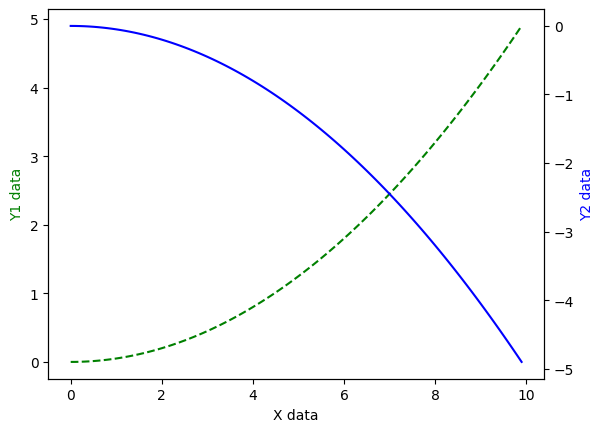

In [46]:
# 获取 figure 默认的坐标系
fig, ax1 = plt.subplots()

# 第二个 y 坐标
# 调用 twinx() 方法，生成如同镜面效果后的 ax2
ax2 = ax1.twinx()

ax1.plot(x, y1, 'g--')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

ax2.plot(x, y2, 'b-') # blue
ax2.set_ylabel('Y2 data', color='b')

plt.show()

## 动画 animation

In [47]:
from matplotlib import animation

<Figure size 640x480 with 0 Axes>

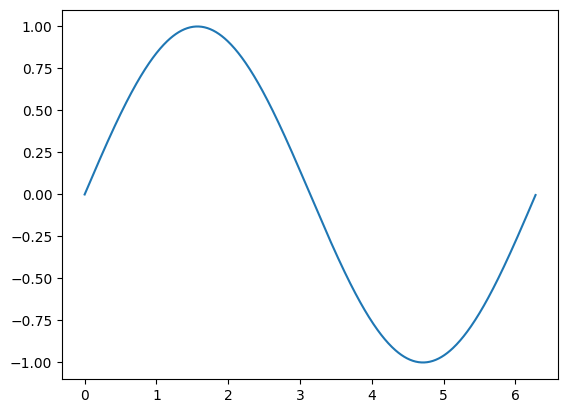

In [48]:
global line, fig, ax

fig = plt.figure()
fig, ax = plt.subplots()

x = np.arange(0, 2 * np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

In [49]:
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))
    return line,

def init():
    line.set_ydata(np.sin(x))
    return line,

调用 FuncAnimation 函数生成动画。参数说明：
1. fig 进行动画绘制的 figure 
2. func 自定义动画函数，即传入刚定义的函数 animate 
3. frames 动画长度，一次循环包含的帧数 
4. init_func 自定义开始帧，即传入刚定义的函数 init 
5. interval 更新频率，以 ms 计 
6. blit 选择更新所有点，还是仅更新产生变化的点。应选择True

In [50]:
anim = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=20,
                              blit=True)

# 将动画以 mp4 格式保存下来
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()